# Testing `dda_from_xarray`

Equivalent testing to whats in `test_dda_initial.ipynb`, except hopefully this will be easier when handling the output data and passing it between the different functions I've developed.

In [1]:
# imports
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmcrameri.cm as cm
import os

import eeasm_icesat.dda as dda

In [2]:
raise NotImplementedError # stops a run all call from being made

NotImplementedError: 

## Apply dda to MPL data

In [ ]:
raise NotImplementedError # stops a run all call from succeeding

In [18]:
fname = '/gws/nopw/j04/ncas_radar_vol2/data/ICECAPSarchive/mpl/leeds_ingested/smtmplpolX1.a1.20190410.000000.cdf'

mpl_data = xr.load_dataset(fname)
mpl_data

<xarray.Dataset>
Dimensions:          (time: 17282, height: 1200)
Coordinates:
  * time             (time) datetime64[ns] 2019-04-10 ... 2019-04-10T23:59:58
  * height           (height) float64 -3e+03 -2.985e+03 ... 1.496e+04 1.497e+04
Data variables: (12/31)
    base_time        datetime64[ns] 2019-04-10
    time_offset      (time) timedelta64[ns] 00:00:00 00:00:05 ... 23:59:58
    hour             (time) float32 0.0 0.001389 0.002778 ... 24.0 24.0 24.0
    nshots           (time) int32 12500 12500 12500 12500 ... 12500 12500 12500
    rep_rate         (time) int32 2500 2500 2500 2500 ... 2500 2500 2500 2500
    energy           (time) float32 5.476 5.475 5.476 5.475 ... 5.44 5.44 5.44
    ...               ...
    E_photon         float64 3.734e-19
    afterpulse_2     (height) float64 0.0002182 0.0003633 ... 0.0003758
    NRB_2            (time, height) float64 nan nan nan nan ... nan nan nan nan
    depol_mpl        (time, height) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    depol_linear     (time, height) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    NRB_total        (time, height) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    Date_created:              2023-02-18T02:01:15 UTC
    Ingest_version:            Id: mpl/raw_to_ingested.py ,v 0.1 2023/02/14 
    comment:                   DOE Atmospheric Radiation Measurement (ARM) Mi...
    Author:                    Dave Turner, NOAA National Severe Storms Labor...
    instrument_serial_number:  108
    instrument_version:        413
    backscatter_comment:       See Flynn et al. 2007 Optics Express paper for...

In [19]:
#mpl_data.NRB_total.plot(x='time',y='height',norm=colors.LogNorm())

In [20]:
kernal_args = {
    'sigma_y': 90, # pixel-wise if dy is unspecified
    'dy': 15, # in m. Thus, we expect 6 bins to account for 90m
    'sigma_x': 30, # estimated typical change time in seconds
    'dx': 5, # in seconds
    'cutoff': 1.5
}

In [21]:
kernal_args2 = {
    'sigma_y': 90, # pixel-wise if dy is unspecified
    'dy': 15, # in m. Thus, we expect 6 bins to account for 90m
    'sigma_x': 60, # estimated typical change time in seconds
    'dx': 5, # in seconds
    'cutoff': 1.5
}

In [22]:
density_args = {} # simply use default arguments for scipy.signal.conv2d function

In [23]:
threshold_args = {
    'bias': 2e-5,
    'sensitivity': 0.8,
    'quantile': 90
}

In [24]:
threshold_args2 = {
    'bias': 1e-5,
    'sensitivity': 0.8,
    'quantile': 90
}

In [25]:
dda_args = {
    'kernal_args':kernal_args,
    'kernal_args2':kernal_args2,
    'threshold_args':threshold_args,
    'threshold_args2':threshold_args2,
    'density_args':density_args,
    'two_pass':True,
    'min_size':1000
}

In [26]:
mpl_data = dda.dda.dda_from_xarray(mpl_data, 'NRB_total', 'height', 'time', **dda_args)

dda_from_xarray
transposed=True : dda_in.shape=(1200, 17282) ; dda_in_da.values.shape=(17282, 1200)
downsample=0
dda.calc_thresholds: calculating thresholds


/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


downsample=0
dda.calc_thresholds: calculating thresholds


In [27]:
mpl_data = dda.compute_cloud_layers(mpl_data)

dda.compute_cloud_layers: cloud_mask.shape=(17282, 1200)
reordering dims: dims=dict_keys(['layer', 'time']); reordered=['layer', 'time']
reordering dims: dims=dict_keys(['layer', 'time']); reordered=['layer', 'time']
reordering dims: dims=dict_keys(['time']); reordered=['time']


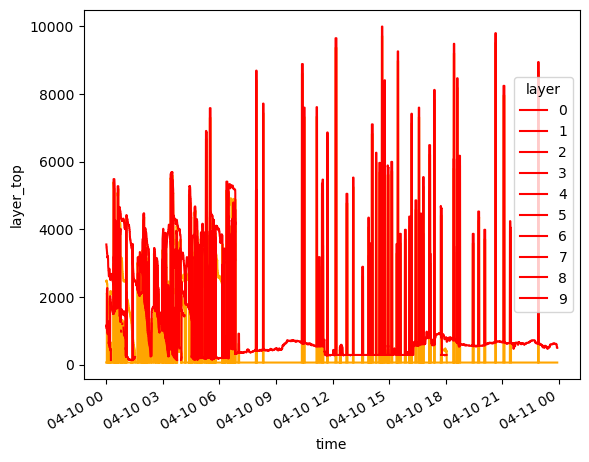

In [28]:
#mpl_data.cloud_mask_passes.plot(x='time',y='height')
mpl_data.layer_bot.plot(x='time',hue='layer',c='orange')
mpl_data.layer_top.plot(x='time',hue='layer',c='red')

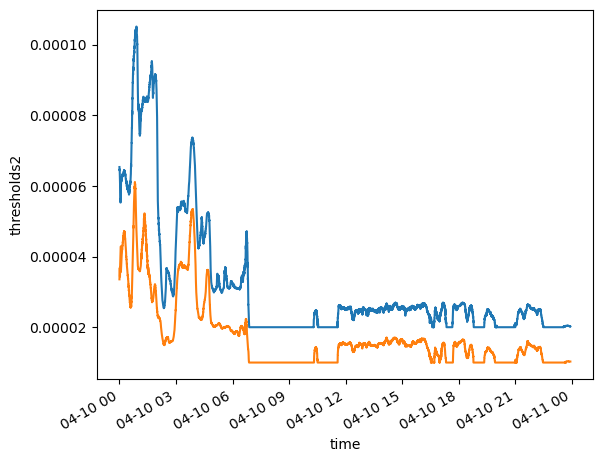

In [29]:
mpl_data.thresholds1.plot(x='time')
mpl_data.thresholds2.plot(x='time')

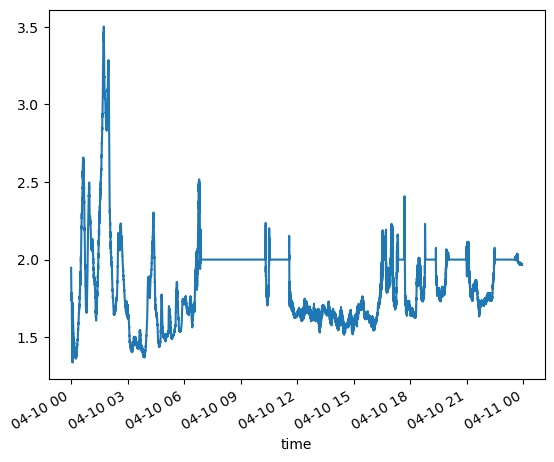

In [30]:
(mpl_data.thresholds1 / mpl_data.thresholds2).plot(x='time')

In [31]:
mpl_data

<xarray.Dataset>
Dimensions:            (layer: 10, time: 17282, height: 1200)
Coordinates:
  * layer              (layer) int64 0 1 2 3 4 5 6 7 8 9
  * time               (time) datetime64[ns] 2019-04-10 ... 2019-04-10T23:59:58
  * height             (height) float64 -3e+03 -2.985e+03 ... 1.497e+04
Data variables: (12/40)
    base_time          datetime64[ns] 2019-04-10
    time_offset        (time) timedelta64[ns] 00:00:00 00:00:05 ... 23:59:58
    hour               (time) float32 0.0 0.001389 0.002778 ... 24.0 24.0 24.0
    nshots             (time) int32 12500 12500 12500 ... 12500 12500 12500
    rep_rate           (time) int32 2500 2500 2500 2500 ... 2500 2500 2500 2500
    energy             (time) float32 5.476 5.475 5.476 5.475 ... 5.44 5.44 5.44
    ...                 ...
    thresholds2        (time) float64 3.355e-05 3.377e-05 3.379e-05 ... nan nan
    cloud_mask_passes  (time, height) int64 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    cloud_mask         (time, height) bool False False False ... False False
    layer_bot          (layer, time) float64 2.456e+03 2.456e+03 ... nan nan
    layer_top          (layer, time) float64 3.55e+03 3.535e+03 ... nan nan
    cloud_flag_atm     (time) float64 2.0 2.0 2.0 2.0 2.0 ... 0.0 0.0 0.0 0.0
Attributes:
    Date_created:              2023-02-18T02:01:15 UTC
    Ingest_version:            Id: mpl/raw_to_ingested.py ,v 0.1 2023/02/14 
    comment:                   DOE Atmospheric Radiation Measurement (ARM) Mi...
    Author:                    Dave Turner, NOAA National Severe Storms Labor...
    instrument_serial_number:  108
    instrument_version:        413
    backscatter_comment:       See Flynn et al. 2007 Optics Express paper for...

# apply dda to ATL09 data
This will test the sel functionality of `dda_from_xarray()`

In [32]:
raise NotImplementedError # stops me from pressing run all

NotImplementedError: 

In [2]:
import eeasm_icesat.atl09 as atl

In [3]:
fname_atl = '/gws/nopw/j04/ncas_radar_vol1/eeasm/paper1/atl09/summit/processed_ATL09_20201120172445_08790901_005_01.h5'


data_high, data_low = atl.load_xarray_from_ATL09.load_xarray_from_ATL09(fname_atl, subsetVariables=atl.load_xarray_from_ATL09.SUBSET_DEFAULT, get_low_rate=True, subsetVariables_low=atl.load_xarray_from_ATL09.SUBSET_LOW_CAL)

data_atl = atl.add_coordinates.add_coordinates(data_high)
data_atl = atl.interp_low_to_high(data_low,data_atl)

del data_high, data_low
data_atl

Frozen({'profile': 3, 'time_index': 1729, 'height': 700, 'layer': 10, 'surface type': 5})


/home/users/eeasm/_scripts/ICESat2/src/eeasm_icesat/atl09/load_xarray_from_ATL09.py:137: RuntimeWarning: invalid value encountered in multiply
  padding_nan = np.empty(padding_shape) * np.nan


Frozen({'profile': 3, 'time_index': 68, 'height': 700, 'layer': 10, 'surface type': 5})
{'profile': array([1, 2, 3]), 'time_index': array([   0,    1,    2, ..., 1726, 1727, 1728])}


<xarray.Dataset>
Dimensions:         (profile: 3, time_index: 1729, height: 700, layer: 10,
                     surface type: 5)
Coordinates:
  * profile         (profile) int64 1 2 3
  * time_index      (time_index) int64 0 1 2 3 4 5 ... 1724 1725 1726 1727 1728
  * height          (height) float32 2e+04 1.997e+04 1.994e+04 ... -925.5 -955.5
  * layer           (layer) int64 0 1 2 3 4 5 6 7 8 9
  * surface type    (surface type) int64 0 1 2 3 4
    d2s             (profile, time_index) float64 221.6 221.3 ... 228.0 228.3
    height_AGL      (profile, time_index, height) float64 1.706e+04 ... -4.01...
    time            (profile, time_index) datetime64[ns] 2020-11-20T17:52:18 ...
Data variables:
    cab_prof        (profile, time_index, height) float64 nan nan ... nan nan
    cloud_flag_atm  (profile, time_index) float64 1.0 1.0 1.0 ... nan nan nan
    delta_time      (profile, time_index) float64 9.113e+07 9.113e+07 ... nan
    ds_va_bin_h     (profile, height) float64 2e+04 1.997e+04 ... -925.5 -955.5
    latitude        (profile, time_index) float64 74.54 74.54 74.54 ... nan nan
    layer_bot       (profile, time_index, layer) float64 7.439e+03 nan ... nan
    layer_top       (profile, time_index, layer) float64 1.02e+04 nan ... nan
    longitude       (profile, time_index) float64 -37.46 -37.46 ... nan nan
    surface_height  (profile, time_index) float64 2.942e+03 2.942e+03 ... nan
    cal_c           (profile, time_index) float64 9.409e+20 ... 8.893e+20

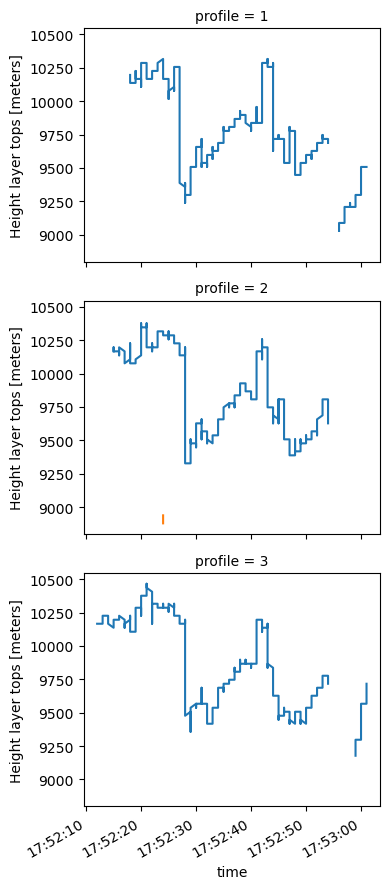

In [4]:
data_atl.layer_top.plot(x='time',hue='layer',col='profile',col_wrap=1,add_legend=False)

In [5]:
data_atl['uncab_prof'] = data_atl.cab_prof * data_atl.cal_c

In [6]:
data_atl.dims

Frozen({'profile': 3, 'time_index': 1729, 'height': 700, 'layer': 10, 'surface type': 5})

In [7]:
#data_atl.uncab_prof.plot(x='time',y='height_AGL',robust=True,vmin=0, col='profile',col_wrap=1)

In [8]:
''' Template for kernal_args
kernal_args = {
    'sigma_y':,
    'dy':,
    'a_m': sigma_x/sigma_y
    'sigma_x':,
    'dx':,
    'cutoff':
    'n' -> superceeded by cutoff
    'm'
}'''
kernal_args = { # parameters given on pg134 of ATBD
    'sigma_y': 3,
    'a_m': 10,
    'cutoff': 1
}

In [9]:
kernal_args2 = {
    'sigma_y': 6,
    'a_m': 20,
    'cutoff': 1
}

In [10]:
density_args = {}

In [11]:
threshold_args = {
    'bias':60e13,
    'sensitivity':1,
    'quantile':0.75,
    'segment_length':2
}

In [12]:
threshold_args2 = {
    'bias':0,
    'sensitivity':1,
    'quantile':0.75,
    'segment_length':2
}

In [13]:
dda_args = {
    'kernal_args':kernal_args,
    'kernal_args2':kernal_args2,
    'threshold_args':threshold_args,
    'threshold_args2':threshold_args2,
    'density_args':density_args,
    'two_pass':True,
    'min_size':300
}

In [14]:
sel_args={'profile':1}

data_atl = dda.dda.dda_from_xarray(data_atl, 'uncab_prof', 'height', 'time_index', sel_args=sel_args, **dda_args)

data_atl

dda_from_xarray
transposed=True : dda_in.shape=(700, 1729) ; dda_in_da.values.shape=(1729, 700)
downsample=0
dda.calc_thresholds: calculating thresholds


/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


downsample=0
dda.calc_thresholds: calculating thresholds


<xarray.Dataset>
Dimensions:            (profile: 3, time_index: 1729, height: 700, layer: 10,
                        surface type: 5)
Coordinates:
  * profile            (profile) int64 1 2 3
  * time_index         (time_index) int64 0 1 2 3 4 ... 1724 1725 1726 1727 1728
  * height             (height) float32 2e+04 1.997e+04 ... -925.5 -955.5
  * layer              (layer) int64 0 1 2 3 4 5 6 7 8 9
  * surface type       (surface type) int64 0 1 2 3 4
    d2s                (profile, time_index) float64 221.6 221.3 ... 228.0 228.3
    height_AGL         (profile, time_index, height) float64 1.706e+04 ... -4...
    time               (profile, time_index) datetime64[ns] 2020-11-20T17:52:...
Data variables: (12/17)
    cab_prof           (profile, time_index, height) float64 nan nan ... nan nan
    cloud_flag_atm     (profile, time_index) float64 1.0 1.0 1.0 ... nan nan nan
    delta_time         (profile, time_index) float64 9.113e+07 9.113e+07 ... nan
    ds_va_bin_h        (profile, height) float64 2e+04 1.997e+04 ... -955.5
    latitude           (profile, time_index) float64 74.54 74.54 ... nan nan
    layer_bot          (profile, time_index, layer) float64 7.439e+03 ... nan
    ...                 ...
    density_pass1      (profile, time_index, height) float64 0.0 0.0 ... nan nan
    thresholds1        (profile, time_index) float64 2.226e+13 2.369e+13 ... nan
    density_pass2      (profile, time_index, height) float64 0.0 0.0 ... nan nan
    thresholds2        (profile, time_index) float64 -5.186e+14 ... nan
    cloud_mask_passes  (profile, time_index, height) float64 2.0 2.0 ... nan nan
    cloud_mask         (profile, time_index, height) float64 1.0 1.0 ... nan nan

In [15]:
data_atl = dda.compute_cloud_layers(data_atl,coord_x='time_index',sel_args=sel_args)
data_atl

dda.compute_cloud_layers: cloud_mask.shape=(1729, 700)
reordering dims: dims=dict_keys(['layer', 'time_index']); reordered=['time_index', 'layer']
reordering dims: dims=dict_keys(['layer', 'time_index']); reordered=['time_index', 'layer']
reordering dims: dims=dict_keys(['time_index']); reordered=['time_index']


<xarray.Dataset>
Dimensions:            (profile: 3, time_index: 1729, height: 700, layer: 10,
                        surface type: 5)
Coordinates:
  * profile            (profile) int64 1 2 3
  * time_index         (time_index) int64 0 1 2 3 4 ... 1724 1725 1726 1727 1728
  * height             (height) float32 2e+04 1.997e+04 ... -925.5 -955.5
  * layer              (layer) int64 0 1 2 3 4 5 6 7 8 9
  * surface type       (surface type) int64 0 1 2 3 4
    d2s                (profile, time_index) float64 221.6 221.3 ... 228.0 228.3
    height_AGL         (profile, time_index, height) float64 1.706e+04 ... -4...
    time               (profile, time_index) datetime64[ns] 2020-11-20T17:52:...
Data variables: (12/17)
    cab_prof           (profile, time_index, height) float64 nan nan ... nan nan
    cloud_flag_atm     (profile, time_index) float64 1.0 2.0 2.0 ... nan nan nan
    delta_time         (profile, time_index) float64 9.113e+07 9.113e+07 ... nan
    ds_va_bin_h        (profile, height) float64 2e+04 1.997e+04 ... -955.5
    latitude           (profile, time_index) float64 74.54 74.54 ... nan nan
    layer_bot          (profile, time_index, layer) float64 63.8 nan ... nan nan
    ...                 ...
    density_pass1      (profile, time_index, height) float64 0.0 0.0 ... nan nan
    thresholds1        (profile, time_index) float64 2.226e+13 2.369e+13 ... nan
    density_pass2      (profile, time_index, height) float64 0.0 0.0 ... nan nan
    thresholds2        (profile, time_index) float64 -5.186e+14 ... nan
    cloud_mask_passes  (profile, time_index, height) float64 2.0 2.0 ... nan nan
    cloud_mask         (profile, time_index, height) float64 1.0 1.0 ... nan nan

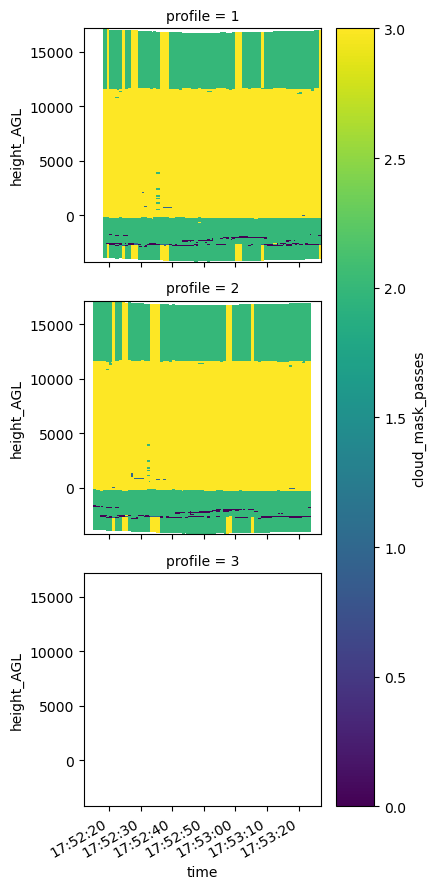

In [16]:
data_atl['cloud_mask_passes'] = xr.where(data_atl.profile==2, data_atl.sel(profile=1).cloud_mask_passes, data_atl['cloud_mask_passes'])
data_atl.cloud_mask_passes.plot(x='time',y='height_AGL', col='profile',col_wrap=1)

dda_from_xarray
transposed=True : dda_in.shape=(700, 1729) ; dda_in_da.values.shape=(1729, 700)
downsample=0
dda.calc_thresholds: calculating thresholds


/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


downsample=0
dda.calc_thresholds: calculating thresholds
dda.compute_cloud_layers: cloud_mask.shape=(1729, 700)
reordering dims: dims=dict_keys(['layer', 'time_index']); reordered=['time_index', 'layer']
reordering dims: dims=dict_keys(['layer', 'time_index']); reordered=['time_index', 'layer']
reordering dims: dims=dict_keys(['time_index']); reordered=['time_index']
dda_from_xarray
transposed=True : dda_in.shape=(700, 1729) ; dda_in_da.values.shape=(1729, 700)
downsample=0
dda.calc_thresholds: calculating thresholds


/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


downsample=0
dda.calc_thresholds: calculating thresholds
dda.compute_cloud_layers: cloud_mask.shape=(1729, 700)
reordering dims: dims=dict_keys(['layer', 'time_index']); reordered=['time_index', 'layer']
reordering dims: dims=dict_keys(['layer', 'time_index']); reordered=['time_index', 'layer']
reordering dims: dims=dict_keys(['time_index']); reordered=['time_index']


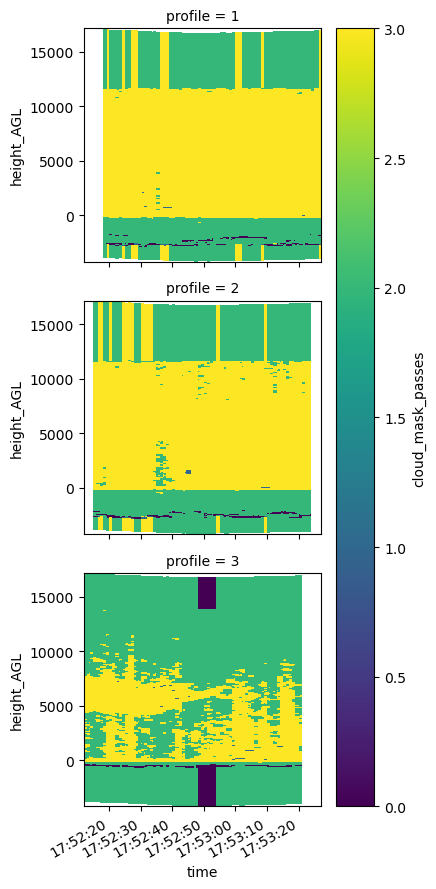

In [17]:
sel_args={'profile':2}
data_atl = dda.dda.dda_from_xarray(data_atl, 'uncab_prof', 'height', 'time_index', sel_args=sel_args, **dda_args)
data_atl = dda.compute_cloud_layers(data_atl,coord_x='time_index',sel_args=sel_args)



sel_args={'profile':3}
data_atl = dda.dda.dda_from_xarray(data_atl, 'uncab_prof', 'height', 'time_index', sel_args=sel_args, **dda_args)
data_atl = dda.compute_cloud_layers(data_atl,coord_x='time_index',sel_args=sel_args)


data_atl.cloud_mask_passes.plot(x='time',y='height_AGL', col='profile',col_wrap=1)

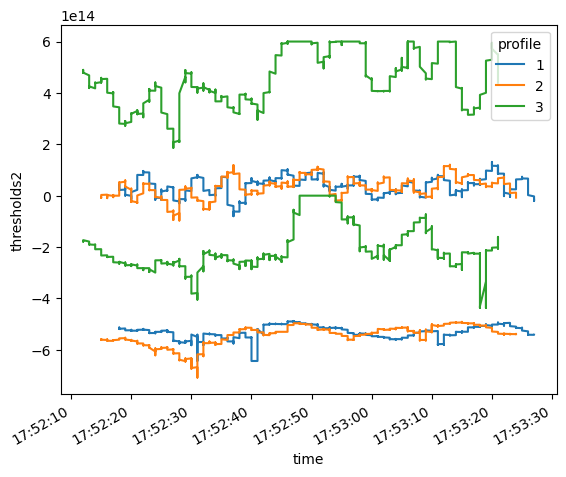

In [18]:
data_atl.thresholds1.plot(x='time',hue='profile')
plt.gca().set_prop_cycle(None) # resets the colour cycle
data_atl.thresholds2.plot(x='time',hue='profile')

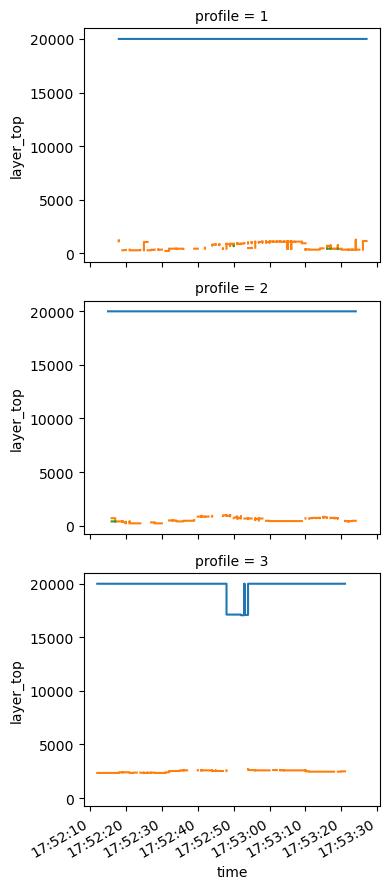

In [21]:
data_atl.layer_top.plot(x='time',hue='layer',col='profile',col_wrap=1,add_legend=False)